In [1]:
!pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
merged_df = pd.read_csv('drive/MyDrive/image_similarity.csv')

In [24]:
name = merged_df['name'].value_counts()
name

Michael       1284
John          1143
Chris         1122
Kevin          864
David          798
              ... 
Maximilian       1
Kegan            1
Cherry           1
Mady             1
Rin              1
Name: name, Length: 398, dtype: int64

In [36]:
single = name[name==1]
print(len(single))

69


In [41]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from skimage import metrics
size = (550, 723)
m = merged_df[merged_df['user_image_url']=='https://s3-media4.fl.yelpcdn.com/photo/Ooy-5hFepdLlduMyoZh9ug/o.jpg']
url1 = m.iloc[0]['user_image_url']
url2 = m.iloc[0]['first_photo_url']
print(url2)
img1 = Image.open(BytesIO(requests.get(url1).content)).resize(size)
img2 = Image.open(BytesIO(requests.get(url2).content)).resize(size)
arr1 = np.array(img1)
arr2 = np.array(img2)
print(arr1.shape, arr2.shape)
ssim_score = metrics.structural_similarity(arr1, arr2, win_size=3, data_range=arr1.max() - arr1.min(), multichannel=True)
print(ssim_score)
print(m.iloc[0]['image_match_ssim'])
m

https://images-ssl.gotinder.com/u/2Y99N2gKhEQMoyKLPXgUvA/iaQD5KjKTsLUWmb3z66qVv.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS8yWTk5TjJnS2hFUU1veUtMUFhnVXZBLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2ODI5MDgwNTV9fX1dfQ__&Signature=DnBcYm4gevBLEt6hdDN8O78KEQqygrsdmqHWCIP8Xta6fBZ0boTz76FCXi6iIqGwkwGPRnJLjRP75tHegNrFThGrfbOxpbLVrU8UcD1RFu0mNCdtBz4Z~RKk4m~-94lrpJGBnCE3~6ntAbsAQsOTsebu2EckXEKYZBdU~doMJOKekE1EBshm0tYCKJtMuDEthn8Oz~EDpw1PqKMdRk-x993QlW3woSAtpcn9UW0XZmat5KMw3MsyB~~AqPHVCpA3wBKlRdc~~8u9f01D6m2cBeTHNRzyD5o2V9CU1w6UOfI438-fS40POKoXH90e7mtnLUATeMAtSZAYWdt9xoGWjg__&Key-Pair-Id=K368TLDEUPA6OI


UnidentifiedImageError: ignored

In [35]:
for key,value in single.items():
  m = merged_df[merged_df['name']==key]
  url_yelp = m.iloc[0]['user_image_url']
  url_tinder = m.iloc[0]['first_photo_url']
  if not pd.isna(url_yelp) and not pd.isna(url_tinder):
    print(url_yelp)
    print(url_tinder)

https://s3-media2.fl.yelpcdn.com/photo/flje340IyrZJrlfkRAPf0g/o.jpg
https://images-ssl.gotinder.com/u/4jCjhKNNJa5ULp2FaqLEjj/rcNfYGrTzRHudYKUs8guc9.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS80akNqaEtOTkphNVVMcDJGYXFMRWpqLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2ODI4OTYwNTB9fX1dfQ__&Signature=n5A1hq~R~9m20DToEScWSFRIuKqX2gdNHO4NSFnDh4DEtBrMUG-UoDm~CyZtrlKGcBNUw5WVGTYBG2dE~YtOM9~FGU1fXMX1O39E8jOxRRpO7EqCv91Cx9jz8wRzilxQtScsZ9RcOOonodqKE9pGejRJwgsyNfqEw7eyUtK0l-vPEePe6ycCHE-099EhskobCHgW-T~DX1UzKM-h6GX1HhnXHdSb9lp4c50NER3Chv47SPB-1MghsCQfSfFrSD2oCW3mGuotBmr3~snqKsdGubO1GzJyxOe42cBXZ6nuEQb-Iiri4zAlIl4Udqk~HOBNdd5kCoUQ-Hi01b1qLhHkFg__&Key-Pair-Id=K368TLDEUPA6OI
https://s3-media4.fl.yelpcdn.com/photo/mI4OtbMiJrFjtG-OIxC7og/o.jpg
https://images-ssl.gotinder.com/u/8vUQ2WXAsacdHmRmyuv7oo/eQzatSPrYizoeTgsedNsnY.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS84dlVRMldYQXNhY2RIbVJteXV2N29vLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiO

In [42]:
image_match = merged_df['image_match'].value_counts()
image_match

0.299242    14
0.378505    14
0.283898    14
0.316084    14
0.348124    14
            ..
0.614123     1
0.460134     1
0.072341     1
0.505494     1
0.315267     1
Name: image_match, Length: 6127, dtype: int64

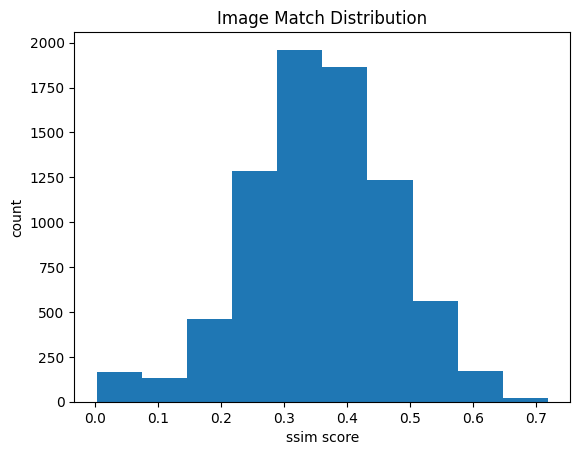

In [44]:
import matplotlib.pyplot as plt
# plot histogram
plt.hist(merged_df['image_match'])#, bins=5, edgecolor='black'
plt.xlabel('ssim score')
plt.ylabel('count')
plt.title('Image Match Distribution')
plt.show()

In [21]:
import webbrowser
m = merged_df[merged_df['image_match']>0.6]
#print(m['user_id_x'])
#print(m['user_id_y'])
print(m.iloc[40]['user_image_url'])
print(m.iloc[40]['first_photo_url'])
print(m.iloc[1]['user_image_url'])
print(m.iloc[1]['first_photo_url'])
print(m.iloc[2]['user_image_url'])
print(m.iloc[2]['first_photo_url'])
webbrowser.open_new_tab(m.iloc[0]['first_photo_url'])
m

https://s3-media1.fl.yelpcdn.com/photo/a2XPAQYKmoWtgQP_AhbfOQ/o.jpg
https://images-ssl.gotinder.com/u/wazqmnXbWNncjDiYTriEYG/3YhRu4HR4rCa1m8ssgpWEo.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS93YXpxbW5YYldObmNqRGlZVHJpRVlHLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2ODI4NTkwNTF9fX1dfQ__&Signature=H7FbOmQh8BQ89Q-FUnmJ1Ar5Hcs22BlOtJfq3kXs2bjU7o0gRMVM18YdvZQMQ4g6MxOJFEgsP04cGJ0J3eh-35AJRBGYgJZFdQULvY4QiBmHN0wryG7FyMwqD9tBqFvbnJ7FWvj3NfJIy-jRsau6XB2bxis-gHC9RAVLCP4LDchNHo7-MP5VIHjHSa6Yij3uTPB0OKoWUe9N2HTmQVo9zpB9P1s4lcv-2tGKuo7OdTc7yFGuYk0Sbbgvglu91XsrgN1gRa1KpMQOGOzpD89pZjnxvPISuaXU3lRPW1Ja8xURjHz6eW6Oduo0pBnG2SbXZGcCM3yCBzQ1cvauLJXuYQ__&Key-Pair-Id=K368TLDEUPA6OI
https://s3-media2.fl.yelpcdn.com/photo/FLeXZUqTyPx0wJh9t5gqfQ/o.jpg
https://images-ssl.gotinder.com/u/m2uXqMpdgCKrnRVxdpX4ND/ukpTztVYsVWEDFtzJKjYBW.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS9tMnVYcU1wZGdDS3JuUlZ4ZHBYNE5ELyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiO

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,review_id,review_url,text,time_created,user_id_x,user_profile_url,user_image_url,...,gender,city,distance,company,job_title,school,first_photo_url,image_match_ssim,facial_recognition,image_match
7,7,7,7,qFkjH-EsWIcj3mOYmVbGSA,https://www.yelp.com/biz/odyssey-italian-resta...,We called and scheduled reservations over a we...,2023-04-24 17:22:31,gMhecXcVrW0Wmd1KJlFg7Q,https://www.yelp.com/user_details?userid=gMhec...,https://s3-media3.fl.yelpcdn.com/photo/fpIB6tw...,...,male,San Francisco,1,NaN,MA,San Francisco State University,https://images-ssl.gotinder.com/u/m2uXqMpdgCKr...,NaN,NaN,0.601827
11,11,11,11,jokXesDCLZjoGWXKyJHlDw,https://www.yelp.com/biz/escape-from-fisherman...,"oh my god , you want claim chowder in a bread ...",2023-03-03 18:09:14,ZBcdw8YMnXJLwBrptZlHcQ,https://www.yelp.com/user_details?userid=ZBcdw...,https://s3-media2.fl.yelpcdn.com/photo/FLeXZUq...,...,male,San Francisco,1,NaN,MA,San Francisco State University,https://images-ssl.gotinder.com/u/m2uXqMpdgCKr...,NaN,NaN,0.612500
130,130,130,130,0KMi1XqORXUbtunmZuVtnA,https://www.yelp.com/biz/fleming-s-prime-steak...,"I'm usually not big on steakhouses, but we cam...",2023-04-18 21:09:52,s8X9tOE_hCHej9ktIuMszg,https://www.yelp.com/user_details?userid=s8X9t...,https://s3-media2.fl.yelpcdn.com/photo/lLeO6h9...,...,not displayed,Oakland,4,NaN,High school English teacher,"University of California, Berkeley",https://images-ssl.gotinder.com/u/ELVUUyhhLzt5...,NaN,NaN,0.618260
454,454,454,454,QfI_jOfgUlUmBghTYBwPDQ,https://www.yelp.com/biz/chilis-vacaville-4?ad...,"The first thing was the hostess, see seen I wa...",2023-02-09 19:58:01,TOL0miHR99Cu4HXfmW1dPQ,https://www.yelp.com/user_details?userid=TOL0m...,https://s3-media4.fl.yelpcdn.com/photo/72HXMXN...,...,not displayed,Oakland,4,NaN,High school English teacher,"University of California, Berkeley",https://images-ssl.gotinder.com/u/ELVUUyhhLzt5...,NaN,NaN,0.625068
766,766,766,766,XwXPgEDk7EBy584jbnjs7w,https://www.yelp.com/biz/rauls-striper-cafe-ri...,Visiting family in Rio Vista and went to break...,2023-04-05 11:38:06,G9yuaN3aSLCEXiwT0n3mFA,https://www.yelp.com/user_details?userid=G9yua...,https://s3-media2.fl.yelpcdn.com/photo/LMk1Kpt...,...,not displayed,Oakland,4,NaN,High school English teacher,"University of California, Berkeley",https://images-ssl.gotinder.com/u/ELVUUyhhLzt5...,NaN,NaN,0.611220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,8398,8398,8398,fcDx8cH64QBi2rLan3CYxw,https://www.yelp.com/biz/firehouse-no-1-gastro...,You know what I hate is when Elite yelpers who...,2023-03-01 00:19:00,s93mGptf5LLAk06ptwGCSg,https://www.yelp.com/user_details?userid=s93mG...,https://s3-media4.fl.yelpcdn.com/photo/2FKdiKj...,...,male,Brunswick,5,NaN,NaN,NaN,https://images-ssl.gotinder.com/u/9gp9Hbn4xA4A...,NaN,NaN,0.622184
8401,8401,8401,8401,_pC7CpZMSBxSsqMhez4O8Q,https://www.yelp.com/biz/district-seven-kitche...,Let me just start by saying this place is amaz...,2023-04-03 16:35:58,PGrgsYfWXa-j6vtqwTKpIA,https://www.yelp.com/user_details?userid=PGrgs...,https://s3-media2.fl.yelpcdn.com/photo/46bhhGx...,...,male,Brunswick,5,NaN,NaN,NaN,https://images-ssl.gotinder.com/u/9gp9Hbn4xA4A...,NaN,NaN,0.637807
8407,8407,8407,8407,Bne7OVQwkqWgmQIhUbQjCA,https://www.yelp.com/biz/range-kitchen-and-tap...,This place is awesome. \n\nWe arrived last nig...,2023-03-16 10:55:32,PGrgsYfWXa-j6vtqwTKpIA,https://www.yelp.com/user_details?userid=PGrgs...,https://s3-media2.fl.yelpcdn.com/photo/46bhhGx...,...,male,Brunswick,5,NaN,NaN,NaN,https://images-ssl.gotinder.com/u/9gp9Hbn4xA4A...,NaN,NaN,0.637807
8482,8482,8482,8482,iRnedm4SNr8rByEqy8RXhQ,https://www.yelp.com/biz/longboards-restaurant...,Visiting the city on a Monday at 1:00 pm for l...,2023-04-10 09:50:09,RknUtQWHuB003480a3PWig,https://www.yelp.com/user_details?userid=RknUt...,https://s3-media2.fl.yelpcdn.com/photo/KGfLPcL...,...,not displayed,NaN,13,Cybersecurity,Regional Director,NaN,https://images-ssl

In [30]:
# run in colab for access of GPU
# https://colab.research.google.com/drive/17EzCzk-v9iMQhChDrjFCfrIFONAdp7qs?usp=sharing
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import numpy as np
from skimage import metrics
import torch
import torchvision.transforms as transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize face detection model
mtcnn = MTCNN(keep_all=True, device=device)

# Initialize face recognition model
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Define function to get facial features from image URL
def get_face_features(url):
    
    # Download image from URL and convert to PyTorch tensor
    img = transforms.ToTensor()(Image.open(BytesIO(requests.get(url).content)).convert('RGB'))
    try:
        # Use MTCNN to detect face in image
        faces, _ = mtcnn(img)
    except (RuntimeError, IndexError) as e:
        print("error",e)
        return None
    print("30",faces)
    # Return None if no face detected
    if faces is None:
        return None
    
    # Use FaceNet to extract facial features from detected face
    face = faces[0].to(device)
    with torch.no_grad():
        features = resnet(face.unsqueeze(0)).cpu().numpy()
    print("39",features.flatten())
    return features.flatten()
   

# Define function to compare facial features and determine if images match
def compare_faces(url1, url2):
    # Get facial features from each image URL
    features1 = get_face_features(url1)
    print("47",features1)
    features2 = get_face_features(url2)
    print("49",features2)
    # Return False if face not detected in one or both images
    if features1 is None or features2 is None:
        return None
    
    # Calculate cosine similarity between facial features
    similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
    
    # Return True if similarity is above threshold, False otherwise
    print("58",similarity)
    return similarity

size = (550, 723)
for index, row in merged_df.iterrows():
    url1 = row['first_photo_url'] # yelp image
    url2 = row['user_image_url'] # tinder image
    if pd.isna(url1) or pd.isna(url2):
        continue
    try:
        merged_df.at[index, 'facial_recognition'] = compare_faces(url1, url2)
    except (OSError, UnidentifiedImageError, IndexError):
        continue

error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty list of Tensors
49 None
error torch.cat(): expected a non-empty list of Tensors
47 None
error torch.cat(): expected a non-empty 

KeyboardInterrupt: ignored

In [10]:
merged_df.to_csv('drive/MyDrive/image_similarity.csv')

In [34]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import requests
from PIL import Image
from io import BytesIO
from torchvision import transforms
import numpy as np

# Initialize MTCNN and FaceNet models
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='vggface2').eval()

# Define function to preprocess image
def preprocess_image(url):
    img = Image.open(BytesIO(requests.get(url).content)).convert('RGB')
    img = transforms.Resize((512, 512))(img)
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])(img)
    return img

# Define function to compare facial features and determine if images match
def compare_faces(url1, url2, min_confidence=0.95):
    # Preprocess images and detect faces
    img1 = preprocess_image(url1)
    img2 = preprocess_image(url2)
    faces1, probs1 = mtcnn(img1, return_prob=True)
    faces2, probs2 = mtcnn(img2, return_prob=True)
    
    # Check if only one face is detected in both images
    if faces1 is None or faces2 is None or len(faces1) != 1 or len(faces2) != 1:
        return None
    
    # Check if confidence score for detected faces is above threshold
    if probs1[0] < min_confidence or probs2[0] < min_confidence:
        return None
    
    # Use FaceNet to extract facial features from detected faces
    features1 = resnet(faces1.unsqueeze(0)).detach().cpu().numpy()
    features2 = resnet(faces2.unsqueeze(0)).detach().cpu().numpy()
    
    # Calculate cosine similarity between facial features
    similarity = np.dot(features1, features2.T) / (np.linalg.norm(features1) * np.linalg.norm(features2))
    print(similarity)
    print(similarity[0][0])
    # Return True if similarity is above threshold, False otherwise
    return similarity[0][0] > 0.6

print(merged_df.at[1, 'first_photo_url'],merged_df.at[1, 'user_image_url'])
print(compare_faces(merged_df.at[1, 'first_photo_url'],merged_df.at[1, 'user_image_url']))

https://images-ssl.gotinder.com/u/m2uXqMpdgCKrnRVxdpX4ND/ukpTztVYsVWEDFtzJKjYBW.jpeg?Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6IiovdS9tMnVYcU1wZGdDS3JuUlZ4ZHBYNE5ELyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2ODI4NjUwMzB9fX1dfQ__&Signature=imhweWEDzeRtEwfeOEEEwvdSZJUF2zY~gdRaRyJ5R9hjlHZG5cVz1KotKYJrBBUszqv2LhsKNsPiqHENvJhQ1cuwH55ZEv957EHfaJAsS8qTnVr7vBWCBywY2qI5F9sw1kV2iXAZz8cczGZKoot-rGCcNS~vmi8Ba2H7t2O13a4Q1mvZOVB5IuBYtmclKB2NhPYs4NUhWuXIIK~hCQLc8vOTM7tgsxdPP6NWOMMIEybuF-4SSQfSk1Jf879SUp9Oe~IdMoTEK12nGE8YtGHj72I35~K5DtFYStJXJNWe36FiupWVtqkEwSso7fwl6bF~UHCmlgjIeDyHiBxiCGsp~g__&Key-Pair-Id=K368TLDEUPA6OI https://s3-media4.fl.yelpcdn.com/photo/yefuIjruKRB7lao7czJWmw/o.jpg


RuntimeError: ignored

In [36]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=e72318792d79b3b9348e74367d5dace2d2bd80f7203b7809163b716f546a9e69
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [37]:
import cv2
import urllib.request
import numpy as np
import face_recognition

# Load Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load images from URLs
url1 = merged_df.at[1, 'first_photo_url']
url2 = merged_df.at[1, 'user_image_url']
img1 = urllib.request.urlopen(url1)
img2 = urllib.request.urlopen(url2)

# Read images as arrays
arr1 = np.asarray(bytearray(img1.read()), dtype=np.uint8)
arr2 = np.asarray(bytearray(img2.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr1, -1)
img2 = cv2.imdecode(arr2, -1)

# Convert to grayscale for face detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect faces using Cascade Classifier
faces1 = face_cascade.detectMultiScale(gray1, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
faces2 = face_cascade.detectMultiScale(gray2, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Compare detected faces using face_recognition library
if len(faces1) > 0 and len(faces2) > 0:
    # Extract face embeddings using face_recognition library
    encodings1 = face_recognition.face_encodings(img1, faces1)
    encodings2 = face_recognition.face_encodings(img2, faces2)
    
    # Compare the first face detected in each image
    if len(encodings1) > 0 and len(encodings2) > 0:
        distance = face_recognition.face_distance(encodings1[0], encodings2[0])
        
        # Print result
        if distance < 0.6:
            print("The two images are of the same person.")
        else:
            print("The two images are of different people.")
else:
    print("No faces detected in one or both of the images.")

No faces detected in one or both of the images.
